In [1]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import contextily as ctx
from shapely.geometry import Point

import numpy as np

import math

import seaborn as sns


In [2]:
# Reading Excel file
df = pd.read_excel('Data/Turbines_At_Whitelee_Wind_Farm.xlsx')

# Print the contents of the Excel file to check the data
print(df.head())

   Number   Latitude  Longitude    Altitude
0       1  55.689156  -4.358035  252.099340
1       2  55.686629  -4.351856  252.848013
2       3  55.695239  -4.363345  246.184076
3       4  55.693418  -4.355582  253.050163
4       5  55.685945  -4.341407  253.846623


In [3]:
# Assume the Excel file contains ‘latitude’ and ‘longitude’ columns.
# Create a GeoDataFrame
gdf = gpd.GeoDataFrame(df, geometry=gpd.points_from_xy(df.Longitude, df.Latitude))

# Set coordinate system to WGS84 (EPSG:4326)
gdf.crs = 'EPSG:4326'

# Convert coordinate system to Web Mercator (EPSG:3857)
gdf = gdf.to_crs(epsg=3857)

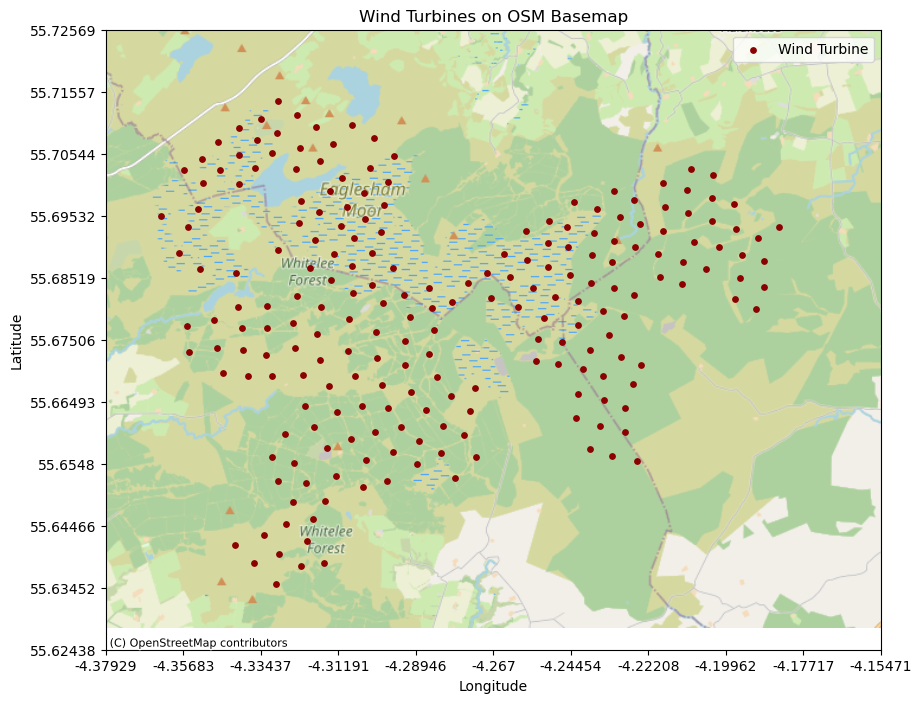

In [4]:
# Create drawings
fig, ax = plt.subplots(figsize=(10, 10))

# Drawing the location of the wind turbine
gdf.plot(ax=ax, marker='o', color='#8B0000', markersize=15, label='Wind Turbine')

# Add OSM basemap
ctx.add_basemap(ax, source=ctx.providers.OpenStreetMap.Mapnik)

# Set up legends and captions
ax.legend()
ax.set_title('Wind Turbines on OSM Basemap')

# Axis coordinates converted back to latitude and longitude and formatted for display
def convert_x(x):
    point = gpd.GeoSeries([Point(x, ax.get_ylim()[0])], crs='EPSG:3857').to_crs('EPSG:4326')
    return round(point.x[0], 5)

def convert_y(y):
    point = gpd.GeoSeries([Point(ax.get_xlim()[0], y)], crs='EPSG:3857').to_crs('EPSG:4326')
    return round(point.y[0], 5)

ax.set_xticks(ax.get_xticks())
ax.set_yticks(ax.get_yticks())
ax.set_xticklabels([convert_x(x) for x in ax.get_xticks()])
ax.set_yticklabels([convert_y(y) for y in ax.get_yticks()])

# Setting up axis labels
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')

# Show drawing
plt.show()

In [5]:
'''
# Parameters for the grid
row = 58  # Size of the grid, e.g., 100x100
column = 73

# Determine the min and max of latitude and longitude
lat_min, lat_max = df['Latitude'].min(), df['Latitude'].max()
lon_min, lon_max = df['Longitude'].min(), df['Longitude'].max()

# Create an empty N x N grid
grid = np.zeros((row, column))

# Function to map lat/lon to grid indices
def map_to_grid(lat, lon, lat_min, lat_max, lon_min, lon_max, num_row, num_column):
    lat_index = int((lat - lat_min) / (lat_max - lat_min) * (num_row - 1))
    lon_index = int((lon - lon_min) / (lon_max - lon_min) * (num_column - 1))
    return lat_index, lon_index

# Mark the turbines in the grid
for _, row in df.iterrows():
    lat_index, lon_index = map_to_grid(row['Latitude'], row['Longitude'], lat_min, lat_max, lon_min, lon_max, row, column)
    grid[lat_index, lon_index] = 1

# Convert the grid to a DataFrame for better visualization (optional)
grid_df = pd.DataFrame(grid)
'''

"\n# Parameters for the grid\nrow = 58  # Size of the grid, e.g., 100x100\ncolumn = 73\n\n# Determine the min and max of latitude and longitude\nlat_min, lat_max = df['Latitude'].min(), df['Latitude'].max()\nlon_min, lon_max = df['Longitude'].min(), df['Longitude'].max()\n\n# Create an empty N x N grid\ngrid = np.zeros((row, column))\n\n# Function to map lat/lon to grid indices\ndef map_to_grid(lat, lon, lat_min, lat_max, lon_min, lon_max, num_row, num_column):\n    lat_index = int((lat - lat_min) / (lat_max - lat_min) * (num_row - 1))\n    lon_index = int((lon - lon_min) / (lon_max - lon_min) * (num_column - 1))\n    return lat_index, lon_index\n\n# Mark the turbines in the grid\nfor _, row in df.iterrows():\n    lat_index, lon_index = map_to_grid(row['Latitude'], row['Longitude'], lat_min, lat_max, lon_min, lon_max, row, column)\n    grid[lat_index, lon_index] = 1\n\n# Convert the grid to a DataFrame for better visualization (optional)\ngrid_df = pd.DataFrame(grid)\n"

In [6]:
# Extract latitude and longitude
latitudes = df['Latitude']
longitudes = df['Longitude']

# Define the grid size
grid_rows = 58
grid_cols = 73

# Calculate the range of latitude and longitude
lat_min, lat_max = latitudes.min(), latitudes.max()
lon_min, lon_max = longitudes.min(), longitudes.max()

# Create an empty grid
grid = np.zeros((grid_rows, grid_cols), dtype=int)

# Populate the grid
for lat, lon in zip(latitudes, longitudes):
    # Calculate the row and column indices for each turbine
    row_idx = int((lat - lat_min) / (lat_max - lat_min) * (grid_rows - 1))
    col_idx = int((lon - lon_min) / (lon_max - lon_min) * (grid_cols - 1))
    grid[row_idx, col_idx] = 1

# Convert the grid to a DataFrame for better visualization (optional)
grid_df = pd.DataFrame(grid)

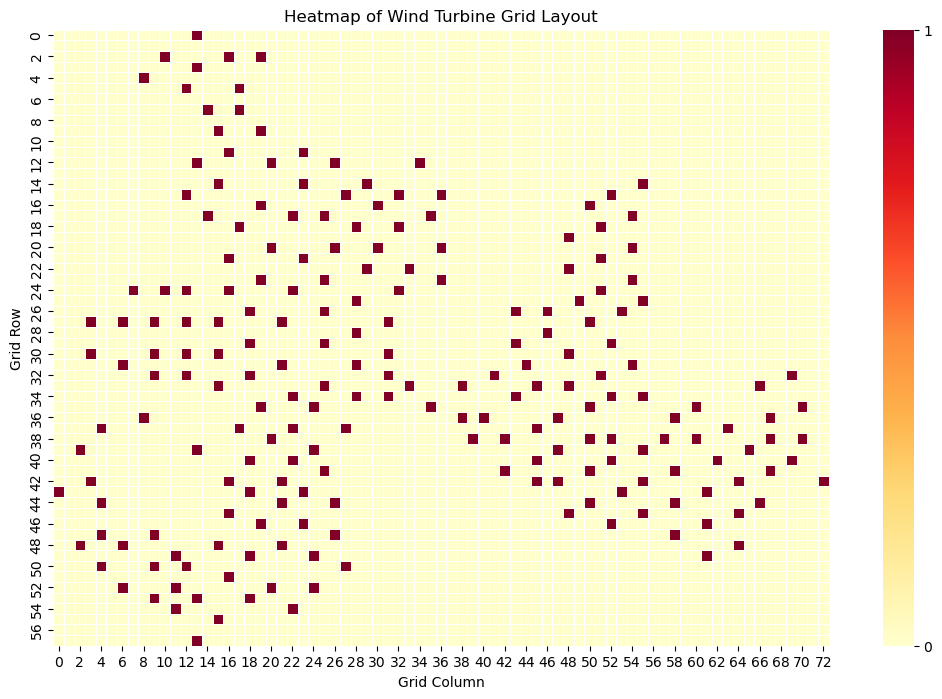

In [7]:
# Plot the heatmap using the correct DataFrame format
plt.figure(figsize=(14, 8))
#sns.heatmap(grid_df, cmap='YlOrRd', cbar=True, square=True, linewidths=0.5, annot=True, fmt="d")
sns.heatmap(grid_df, cmap='YlOrRd', cbar=True, square=True, 
            linewidths=0.5, annot=False,  
            vmin=0, vmax=1,  
            cbar_kws={'ticks': [0, 1]})  
plt.title('Heatmap of Wind Turbine Grid Layout')
plt.xlabel('Grid Column')
plt.ylabel('Grid Row')
plt.show()


In [8]:
grid_df

,0,1,2,3,4,5,6,7,8,9,...,63,64,65,66,67,68,69,70,71,72
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [9]:
# Save the grid to a CSV file
output_path = 'Data/turbine_grid.csv'
grid_df.to_csv(output_path, index=False)

print(f"The grid has been saved to {output_path}")

The grid has been saved to Data/turbine_grid.csv


In [10]:
# Save the grid to .dat gile
dat_file = 'Data/turbine_grid.dat'
grid_df.to_csv(dat_file, sep=' ', header=False, index=False)

print(f"The grid has been saved to {dat_file}")

The grid has been saved to Data/turbine_grid.dat


In [11]:
count_ones = np.sum(grid_df.values == 1)

In [12]:
count_ones

215

In [13]:
print(lon_min)
print(lon_max)
print(lat_min)
print(lat_max)

-4.3633451
-4.1843088
55.6350646
55.7140006


In [14]:
# Radius of the Earth
R = 6371  # km

# The value of two degrees of longitude
lon1 = -4.3633451
lon2 = -4.1843088

# Average latitude (assuming constant latitude, using average latitude as a reference)
lat = 55.6745235 

# Converting latitude to radians
lat_rad = math.radians(lat)

# Longitude difference converted to radians
delta_lon = math.radians(lon2 - lon1)

# Calculate the arc length of longitude at that latitude
distance = R * delta_lon * math.cos(lat_rad)

print(f"The distance between the two longitudes is: {distance:.2f} km")


The distance between the two longitudes is: 11.23 km


In [15]:
import math

# Radius of the Earth
R = 6371  # km

# The value of two degrees of longitude
lat1 = 55.7140006
lat2 = 55.6350646

# Longitude difference converted to radians
delta_lat = math.radians(lat1 - lat2)

# Calculate the arc length of longitude at that latitude
distance = R * delta_lat

print(f"The distance between the two latitudes is: {distance:.2f} km")


The distance between the two latitudes is: 8.78 km


# Change result to form

In [16]:
# Load the .dat file containing the optimized grid layout
file_path_optimised_layout = 'Data/Best_layouts_WeatherSpark.dat'
optimized_grid_flat = np.loadtxt(file_path_optimised_layout)

# Reshape the 1D array into a 2D grid with dimensions 58x73
grid_rows = 58
grid_cols = 73
optimized_grid = optimized_grid_flat.reshape((grid_rows, grid_cols))

# Display the shape to confirm
optimized_grid.shape

optimized_grid_df = pd.DataFrame(optimized_grid)


In [17]:
# Extract latitude and longitude
latitudes = df['Latitude']
longitudes = df['Longitude']

# Calculate latitude and longitude ranges
lat_min, lat_max = latitudes.min(), latitudes.max()
lon_min, lon_max = longitudes.min(), longitudes.max()

# Create an empty list to store the latitude and longitude of turbines
optimized_coordinates = []

# Traverse the layout matrix to find all turbine locations
for row_idx in range(grid_rows):
    for col_idx in range(grid_cols):
        if optimized_grid[row_idx, col_idx] == 1:
            # Calculate the corresponding latitude and longitude
            lat = lat_min + (lat_max - lat_min) * row_idx / (grid_rows - 1)
            lon = lon_min + (lon_max - lon_min) * col_idx / (grid_cols - 1)
            optimized_coordinates.append((lat, lon))

# Convert results to DataFrame
optimized_df = pd.DataFrame(optimized_coordinates, columns=['Latitude', 'Longitude'])

# Save to CSV file
optimized_df.to_csv('Data/optimized_turbine_coordinates.csv', index=False)

# Output results
optimized_df.head()


,Latitude,Longitude
0,55.635065,-4.350912
1,55.635065,-4.293720
2,55.635065,-4.278800
3,55.635065,-4.189282
4,55.636449,-4.288747


In [18]:
print(optimized_df.head())

    Latitude  Longitude
0  55.635065  -4.350912
1  55.635065  -4.293720
2  55.635065  -4.278800
3  55.635065  -4.189282
4  55.636449  -4.288747


In [19]:
# Assume the Excel file contains ‘latitude’ and ‘longitude’ columns.
# Create a GeoDataFrame
optimized_gdf = gpd.GeoDataFrame(optimized_df, geometry=gpd.points_from_xy(optimized_df.Longitude, optimized_df.Latitude))

# Set coordinate system to WGS84 (EPSG:4326)
optimized_gdf.crs = 'EPSG:4326'

# Convert coordinate system to Web Mercator (EPSG:3857)
optimized_gdf = optimized_gdf.to_crs(epsg=3857)

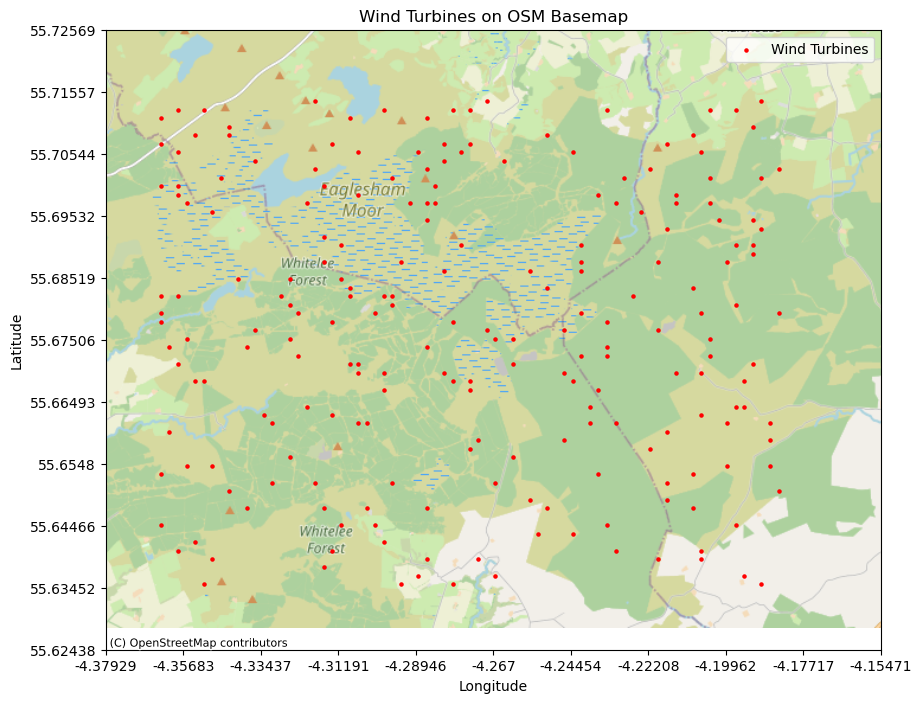

In [20]:
# Create drawings
fig, ax = plt.subplots(figsize=(10, 10))

# Drawing the location of the wind turbine
optimized_gdf.plot(ax=ax, marker='o', color='red', markersize=5, label='Wind Turbines')

# Add OSM basemap
ctx.add_basemap(ax, source=ctx.providers.OpenStreetMap.Mapnik)

# Set up legends and captions
ax.legend()
ax.set_title('Wind Turbines on OSM Basemap')

# Axis coordinates converted back to latitude and longitude and formatted for display
def convert_x(x):
    point = gpd.GeoSeries([Point(x, ax.get_ylim()[0])], crs='EPSG:3857').to_crs('EPSG:4326')
    return round(point.x[0], 5)

def convert_y(y):
    point = gpd.GeoSeries([Point(ax.get_xlim()[0], y)], crs='EPSG:3857').to_crs('EPSG:4326')
    return round(point.y[0], 5)

ax.set_xticks(ax.get_xticks())
ax.set_yticks(ax.get_yticks())
ax.set_xticklabels([convert_x(x) for x in ax.get_xticks()])
ax.set_yticklabels([convert_y(y) for y in ax.get_yticks()])

# Setting up axis labels
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')

# Show drawing
plt.show()

In [21]:
optimized_grid_df = optimized_grid_df.astype(int)

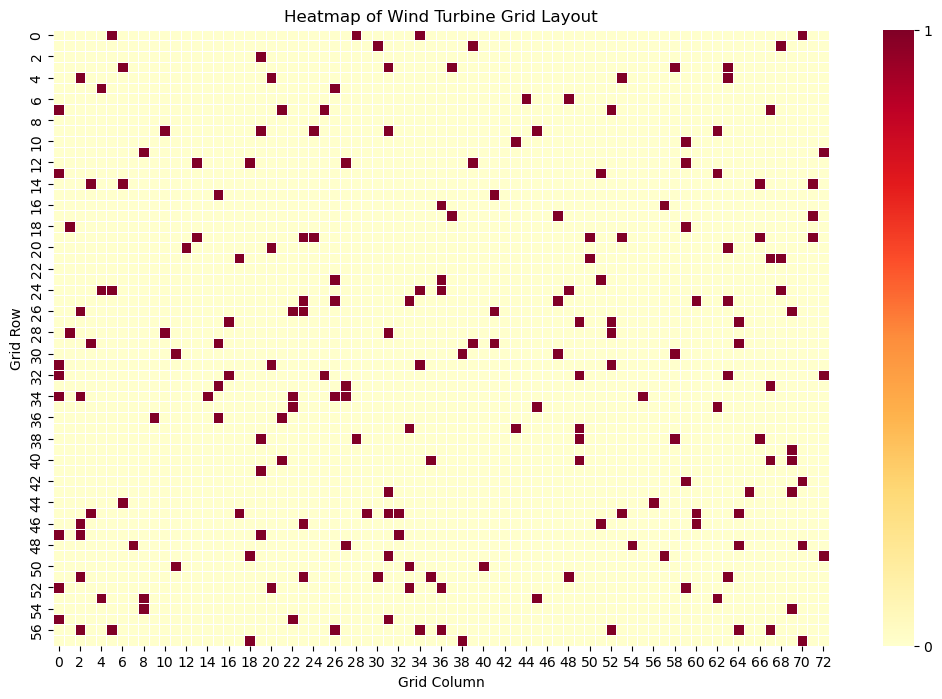

In [22]:
# Plot the heatmap using the correct DataFrame format
plt.figure(figsize=(14, 8))
#sns.heatmap(optimized_grid_df, cmap='YlOrRd', cbar=True, square=True, linewidths=0.5, annot=True, fmt="d")
sns.heatmap(optimized_grid_df, cmap='YlOrRd', cbar=True, square=True, 
            linewidths=0.5, annot=False,  
            vmin=0, vmax=1,  
            cbar_kws={'ticks': [0, 1]})  
plt.title('Heatmap of Wind Turbine Grid Layout')
plt.xlabel('Grid Column')
plt.ylabel('Grid Row')
plt.show()


In [23]:
count_optimized = np.sum(optimized_grid_df.values == 1)
count_optimized

215